tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


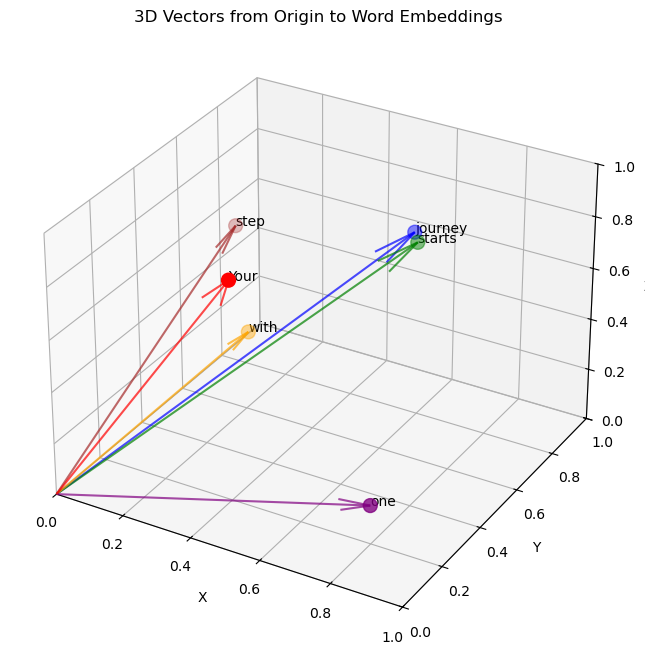

In [ ]:
# simiplified attention

import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

print(inputs)

# plot it on matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))

# plot the input vectors along with words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']
ax = fig.add_subplot(111, projection='3d')

# Define colors for each vector
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Plot the points with different colors
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], c=colors, marker='o', s=100)

# Create 3D vectors from origin to each point with different colors
for i in range(len(inputs)):
    # Draw vector from origin to each point with unique color
    ax.quiver(0, 0, 0, 
              inputs[i, 0], inputs[i, 1], inputs[i, 2], 
              color=colors[i], alpha=0.7, arrow_length_ratio=0.1)

# set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# add word annotations
for i, word in enumerate(words):
    ax.text(inputs[i, 0], inputs[i, 1], inputs[i, 2], word, fontsize=10)

# Set equal aspect ratio for better visualization
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# show the plot
plt.title('3D Vectors from Origin to Word Embeddings')
plt.show()


In [15]:
# finding dot product for second x as query 

query = inputs[1]

attention_scores_2 = torch.empty(inputs.shape[0])

# calculate the dot product of query and all the inputs
for i in range(len(inputs)):
    attention_scores_2[i] = torch.dot(query, inputs[i])

print(attention_scores_2)

def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_naive_2 = softmax_naive(attention_scores_2)

sum = torch.sum(attn_weights_naive_2)

print("Attention weights:", attn_weights_naive_2)
print("Sum of attention weights:", sum)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: tensor(1.)


attn_weights_naive_2[i] tensor(0.1385)
x_i tensor([0.4300, 0.1500, 0.8900])
attn_weights_naive_2[i] tensor(0.2379)
x_i tensor([0.5500, 0.8700, 0.6600])
attn_weights_naive_2[i] tensor(0.2333)
x_i tensor([0.5700, 0.8500, 0.6400])
attn_weights_naive_2[i] tensor(0.1240)
x_i tensor([0.2200, 0.5800, 0.3300])
attn_weights_naive_2[i] tensor(0.1082)
x_i tensor([0.7700, 0.2500, 0.1000])
attn_weights_naive_2[i] tensor(0.1581)
x_i tensor([0.0500, 0.8000, 0.5500])
context_vec_2 tensor([0.4419, 0.6515, 0.5683])
tensor([0.4419, 0.6515, 0.5683])


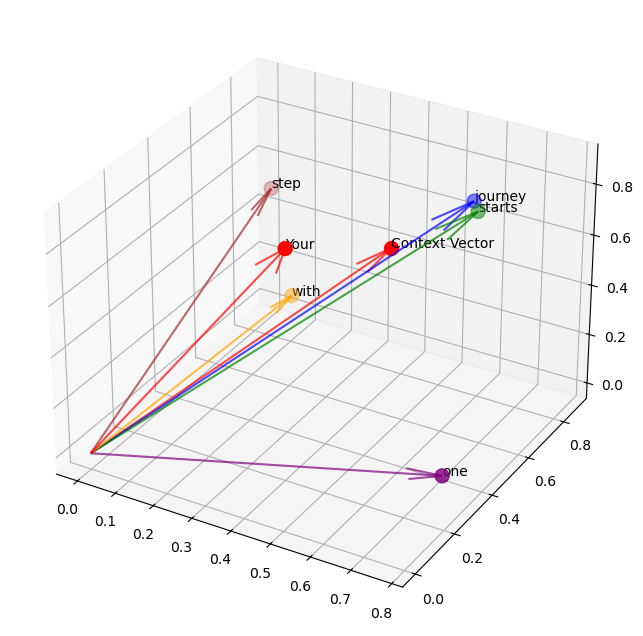

In [36]:
context_vec_2 = torch.zeros(query.shape[0])
for i, x_i in enumerate(inputs):
    print("attn_weights_naive_2[i]", attn_weights_naive_2[i])
    print("x_i", x_i)
    context_vec_2 += attn_weights_naive_2[i] * x_i
print("context_vec_2", context_vec_2)

context_vector_2 = torch.sum(inputs * attn_weights_naive_2.unsqueeze(1), dim=0)

print(context_vector_2)

# plot the context vector and all the inputs with text arrow from origin to context vector
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], c=colors, marker='o', s=100)
ax.scatter(context_vector_2[0], context_vector_2[1], context_vector_2[2], c='red', marker='o', s=100)

# draw arrow from origin to context vector
ax.quiver(0, 0, 0, context_vector_2[0], context_vector_2[1], context_vector_2[2], color='red', alpha=0.7, arrow_length_ratio=0.1)

# draw arrow from origin to each input
for i in range(len(inputs)):
    ax.quiver(0, 0, 0, inputs[i, 0], inputs[i, 1], inputs[i, 2], color=colors[i], alpha=0.7, arrow_length_ratio=0.1)

for i, word in enumerate(words):
    ax.text(inputs[i, 0], inputs[i, 1], inputs[i, 2], word, fontsize=10)

ax.text(context_vector_2[0], context_vector_2[1], context_vector_2[2], 'Context Vector', fontsize=10)

plt.show()


In [ ]:
# calculate the dot product for all the inputs as queries
# calculate the attention score
# calculate the attention weights
# calculate the context vector

# do for all the inputs 
def attention_weights(inputs):
    attn_weights = torch.empty(6,6)
    for i in range(len(inputs)):
        query = inputs[i]
        # print("query_i", i)
        attention_scores_x = torch.empty(inputs.shape[0])
        for j in range(len(inputs)):
            attention_scores_x[j] = torch.dot(query, inputs[j])
            # print("attention_scores_x", attention_scores_x)
        attention_weights_x = torch.softmax(attention_scores_x, dim=0)
        # print("attention_weights_x", attention_weights_x)
        attn_weights[i] = attention_weights_x
    return attn_weights


print("inputs", inputs)
attn_weights = attention_weights(inputs)
print("attn_weights", attn_weights)


# better way to calculate attention score 
attn_scores = inputs @ inputs.T
print("attn_scores using matrix multiplication", attn_scores)

# attention weights = normalized attention scores
attn_weights = torch.softmax(attn_scores, dim=-1)
print("attn_weights using matrix multiplication", attn_weights)


inputs tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
attn_weights tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
attn_scores using matrix multiplication tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
attn_weights using matrix multiplicat

In [46]:

# atten_weights dims 6x6
# inputs dims 6x3
# all_context_vectors dims 6x3
all_context_vectors = attn_weights @ inputs
print("all_context_vectors using matrix multiplication\n", all_context_vectors)



all_context_vectors using matrix multiplication
 tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
